<a href="https://colab.research.google.com/github/KamranUmer/YoloV5_pns/blob/main/updated_1__YOLOv5_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

Clone Dataset, GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-307-g920c721e Python-3.10.12 torch-2.2.1+cu121 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.9/107.7 GB disk)


In [2]:
# !pip install python-dotenv


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from dotenv import load_dotenv
import os

# Load variables from .env file
load_dotenv()

# Access the variables
api_key = os.getenv("api_key")

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key = api_key)
project = rf.workspace("fyp-4bxff").project("pns-detection")
version = project.version(4)
dataset = version.download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PNS-Detection-4 in yolov5pytorch:: 100%|██████████| 450/450 [00:00<00:00, 8479.05it/s]


In [ ]:
# %cd ..

/content/yolov5


In [ ]:
# dataset.location

In [4]:
%cd /content/yolov5

/content/yolov5


In [4]:
!python train.py --img 640 --batch 16 --epochs 100 --data PNS-Detection-4/data.yaml --project /content/drive/MyDrive/YoloV5_PNS/ --weights yolov5s.pt --cache

2024-05-12 13:08:47.449843: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-12 13:08:47.449898: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-12 13:08:47.452106: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=PNS-Detection-4/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
# !python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5s.pt --cache

2023-04-09 14:11:38.063605: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-09 14:11:39.026661: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_inter

# 4. Visualize

In [6]:
!python detect.py --weights /content/drive/MyDrive/YoloV5_PNS/exp2/weights/best.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/YoloV5_PNS/images/i-60-_jpg.rf.8a3485cc13b48fa69a057384624bd230.jpg
# display.Image(filename='runs/detect/exp/zidane.jpg', width=600)

detect: weights=['/content/drive/MyDrive/YoloV5_PNS/exp2/weights/best.pt'], source=/content/drive/MyDrive/YoloV5_PNS/images/i-60-_jpg.rf.8a3485cc13b48fa69a057384624bd230.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-307-g920c721e Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/YoloV5_PNS/images/i-60-_jpg.rf.8a3485cc13b48fa69a057384624bd230.jpg: 640x640 2 Normals, 508.4ms
Speed: 8.6ms pre-process, 508.4ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


In [8]:
from utils.plots import plot_results  # plot results.txt as results.png


In [9]:
from IPython.display import Image, clear_output  # to display images


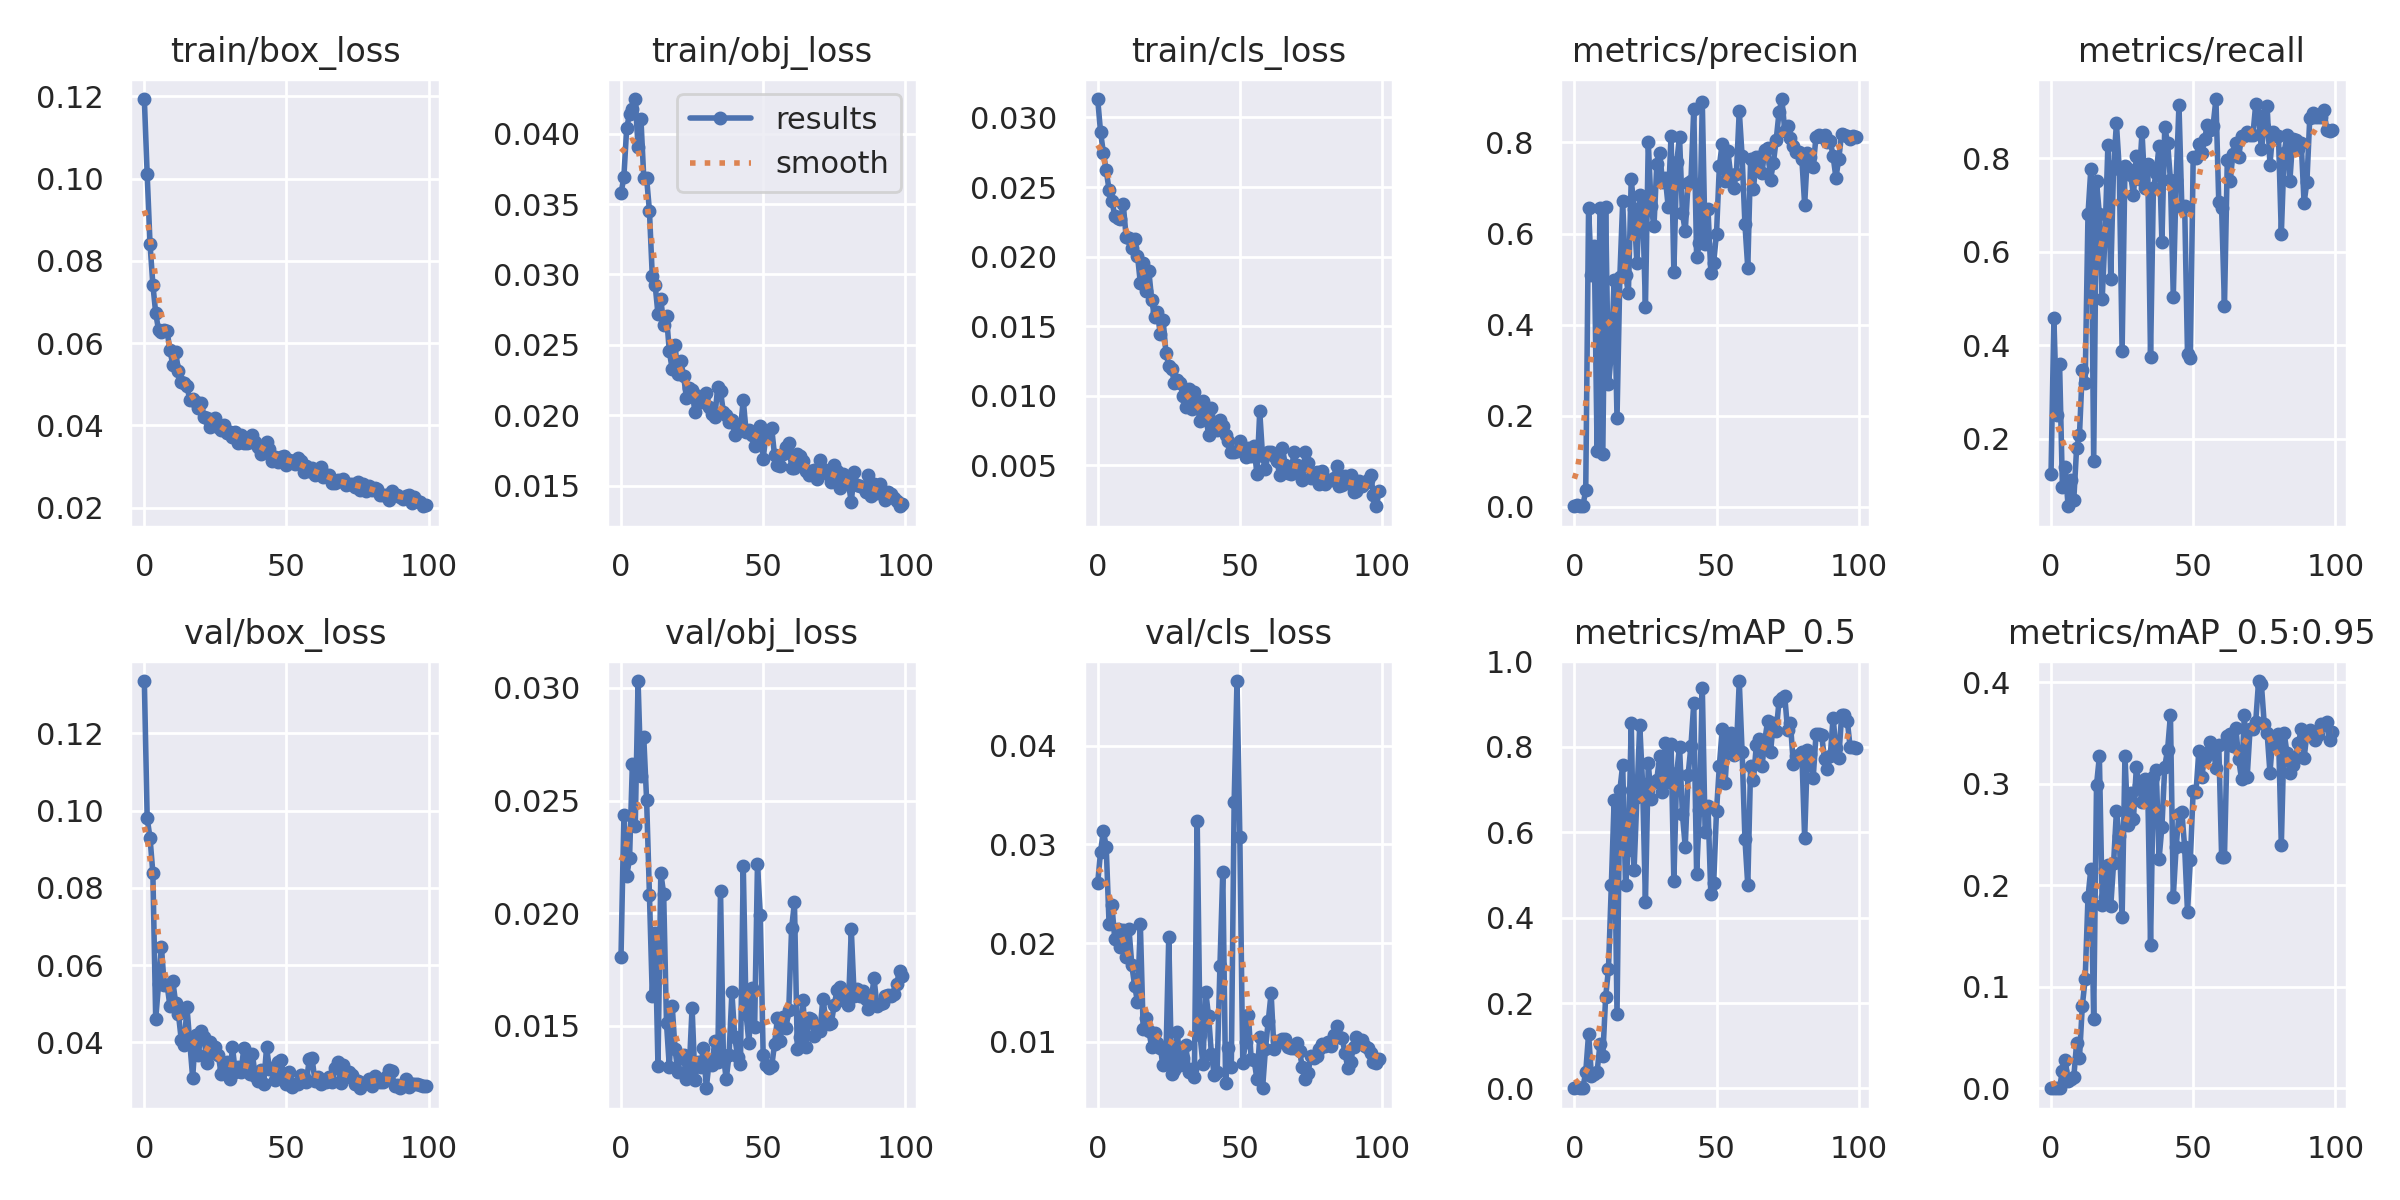

In [16]:
Image(filename='/content/drive/MyDrive/YoloV5_PNS/exp2/results.png', width=900)  # view results.png

In [12]:
!python detect.py --weights /content/drive/MyDrive/YoloV5_PNS/exp2/weights/best.pt --img 640 --conf 0.4 --source /content/drive/MyDrive/YoloV5_PNS/images/

detect: weights=['/content/drive/MyDrive/YoloV5_PNS/exp2/weights/best.pt'], source=/content/drive/MyDrive/YoloV5_PNS/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-307-g920c721e Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/6 /content/drive/MyDrive/YoloV5_PNS/images/f-2-_jpg.rf.1891ab4eecf5e725a11641a8b992a98f.jpg: 640x640 2 Normals, 522.4ms
image 2/6 /content/drive/MyDrive/YoloV5_PNS/images/g-25-_jpg.rf.40b513a4b522c1b4948d790c4a05db57.jpg: 640x640 2 Effecteds, 425.2ms
image 3/6 /content/drive/MyDrive/YoloV5_PNS/image

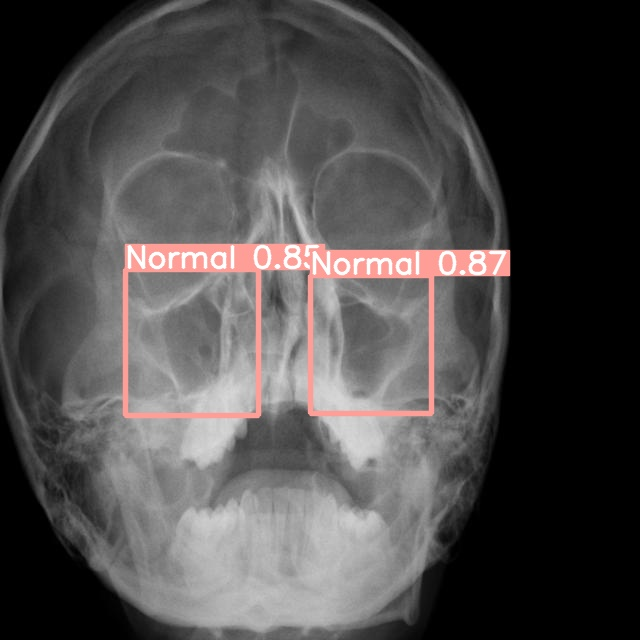

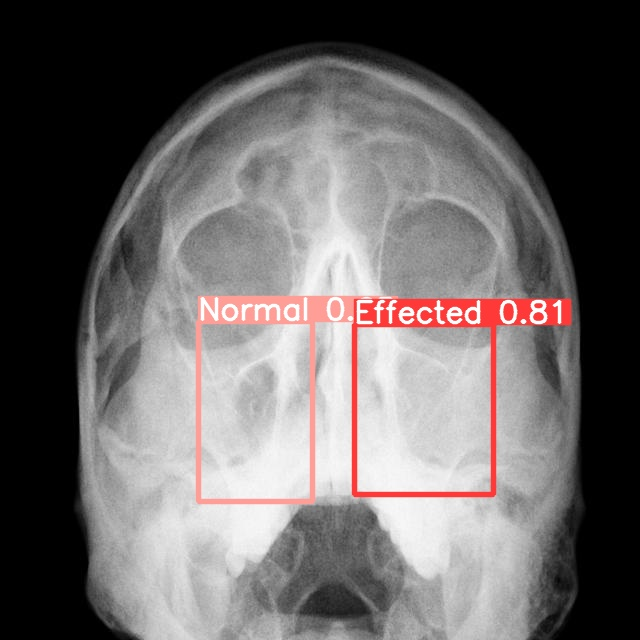

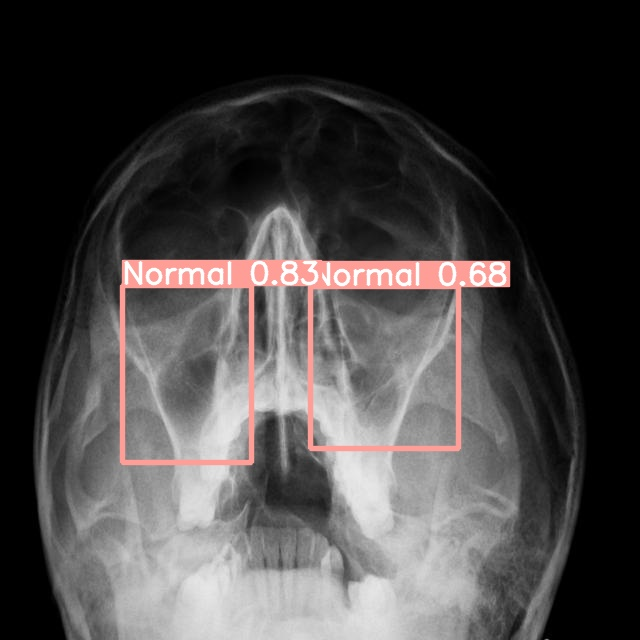

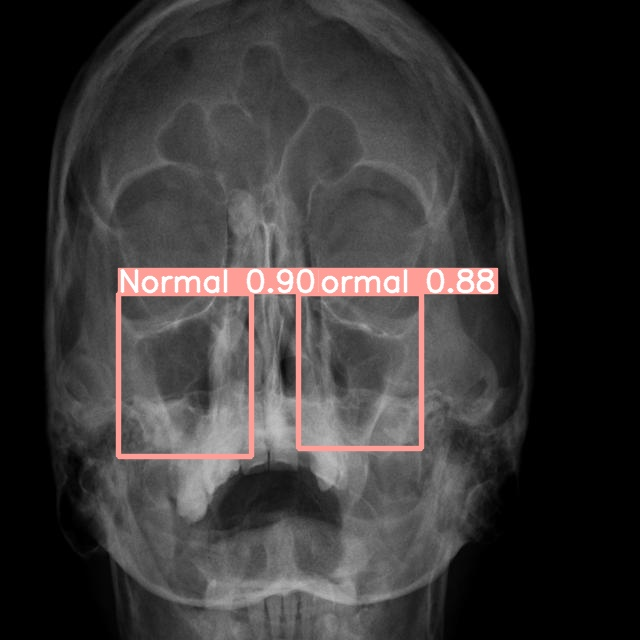

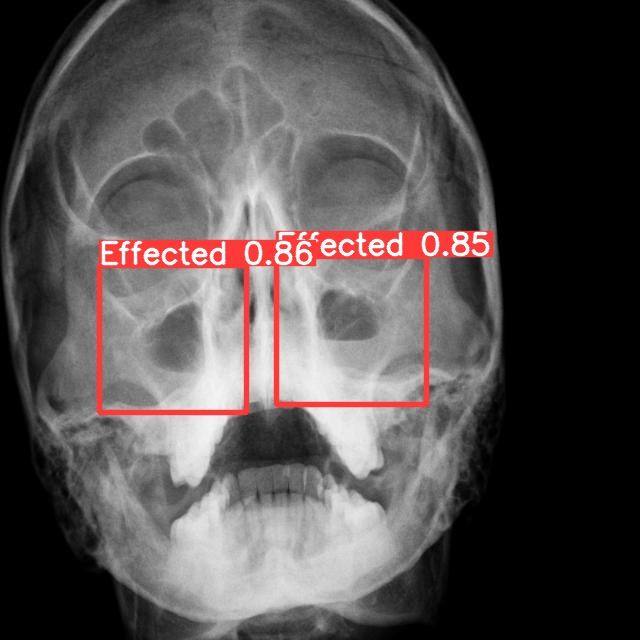

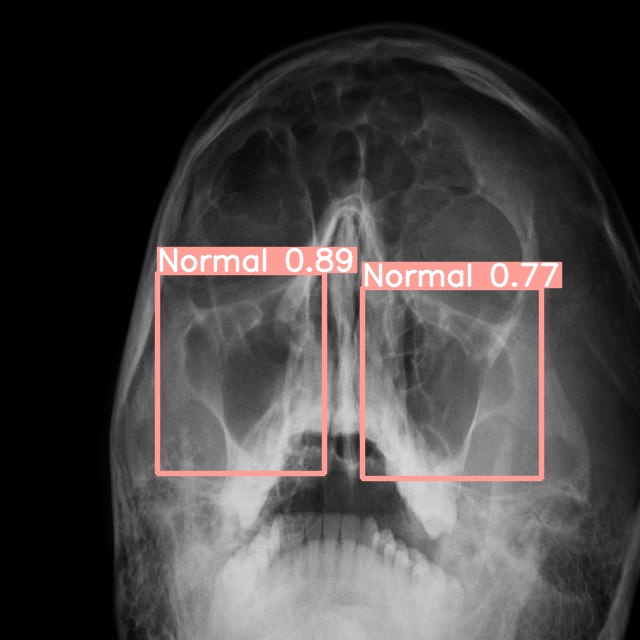

In [13]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp3/*.jpg')[:10]: #assuming JPG
    display(Image(filename=imageName))

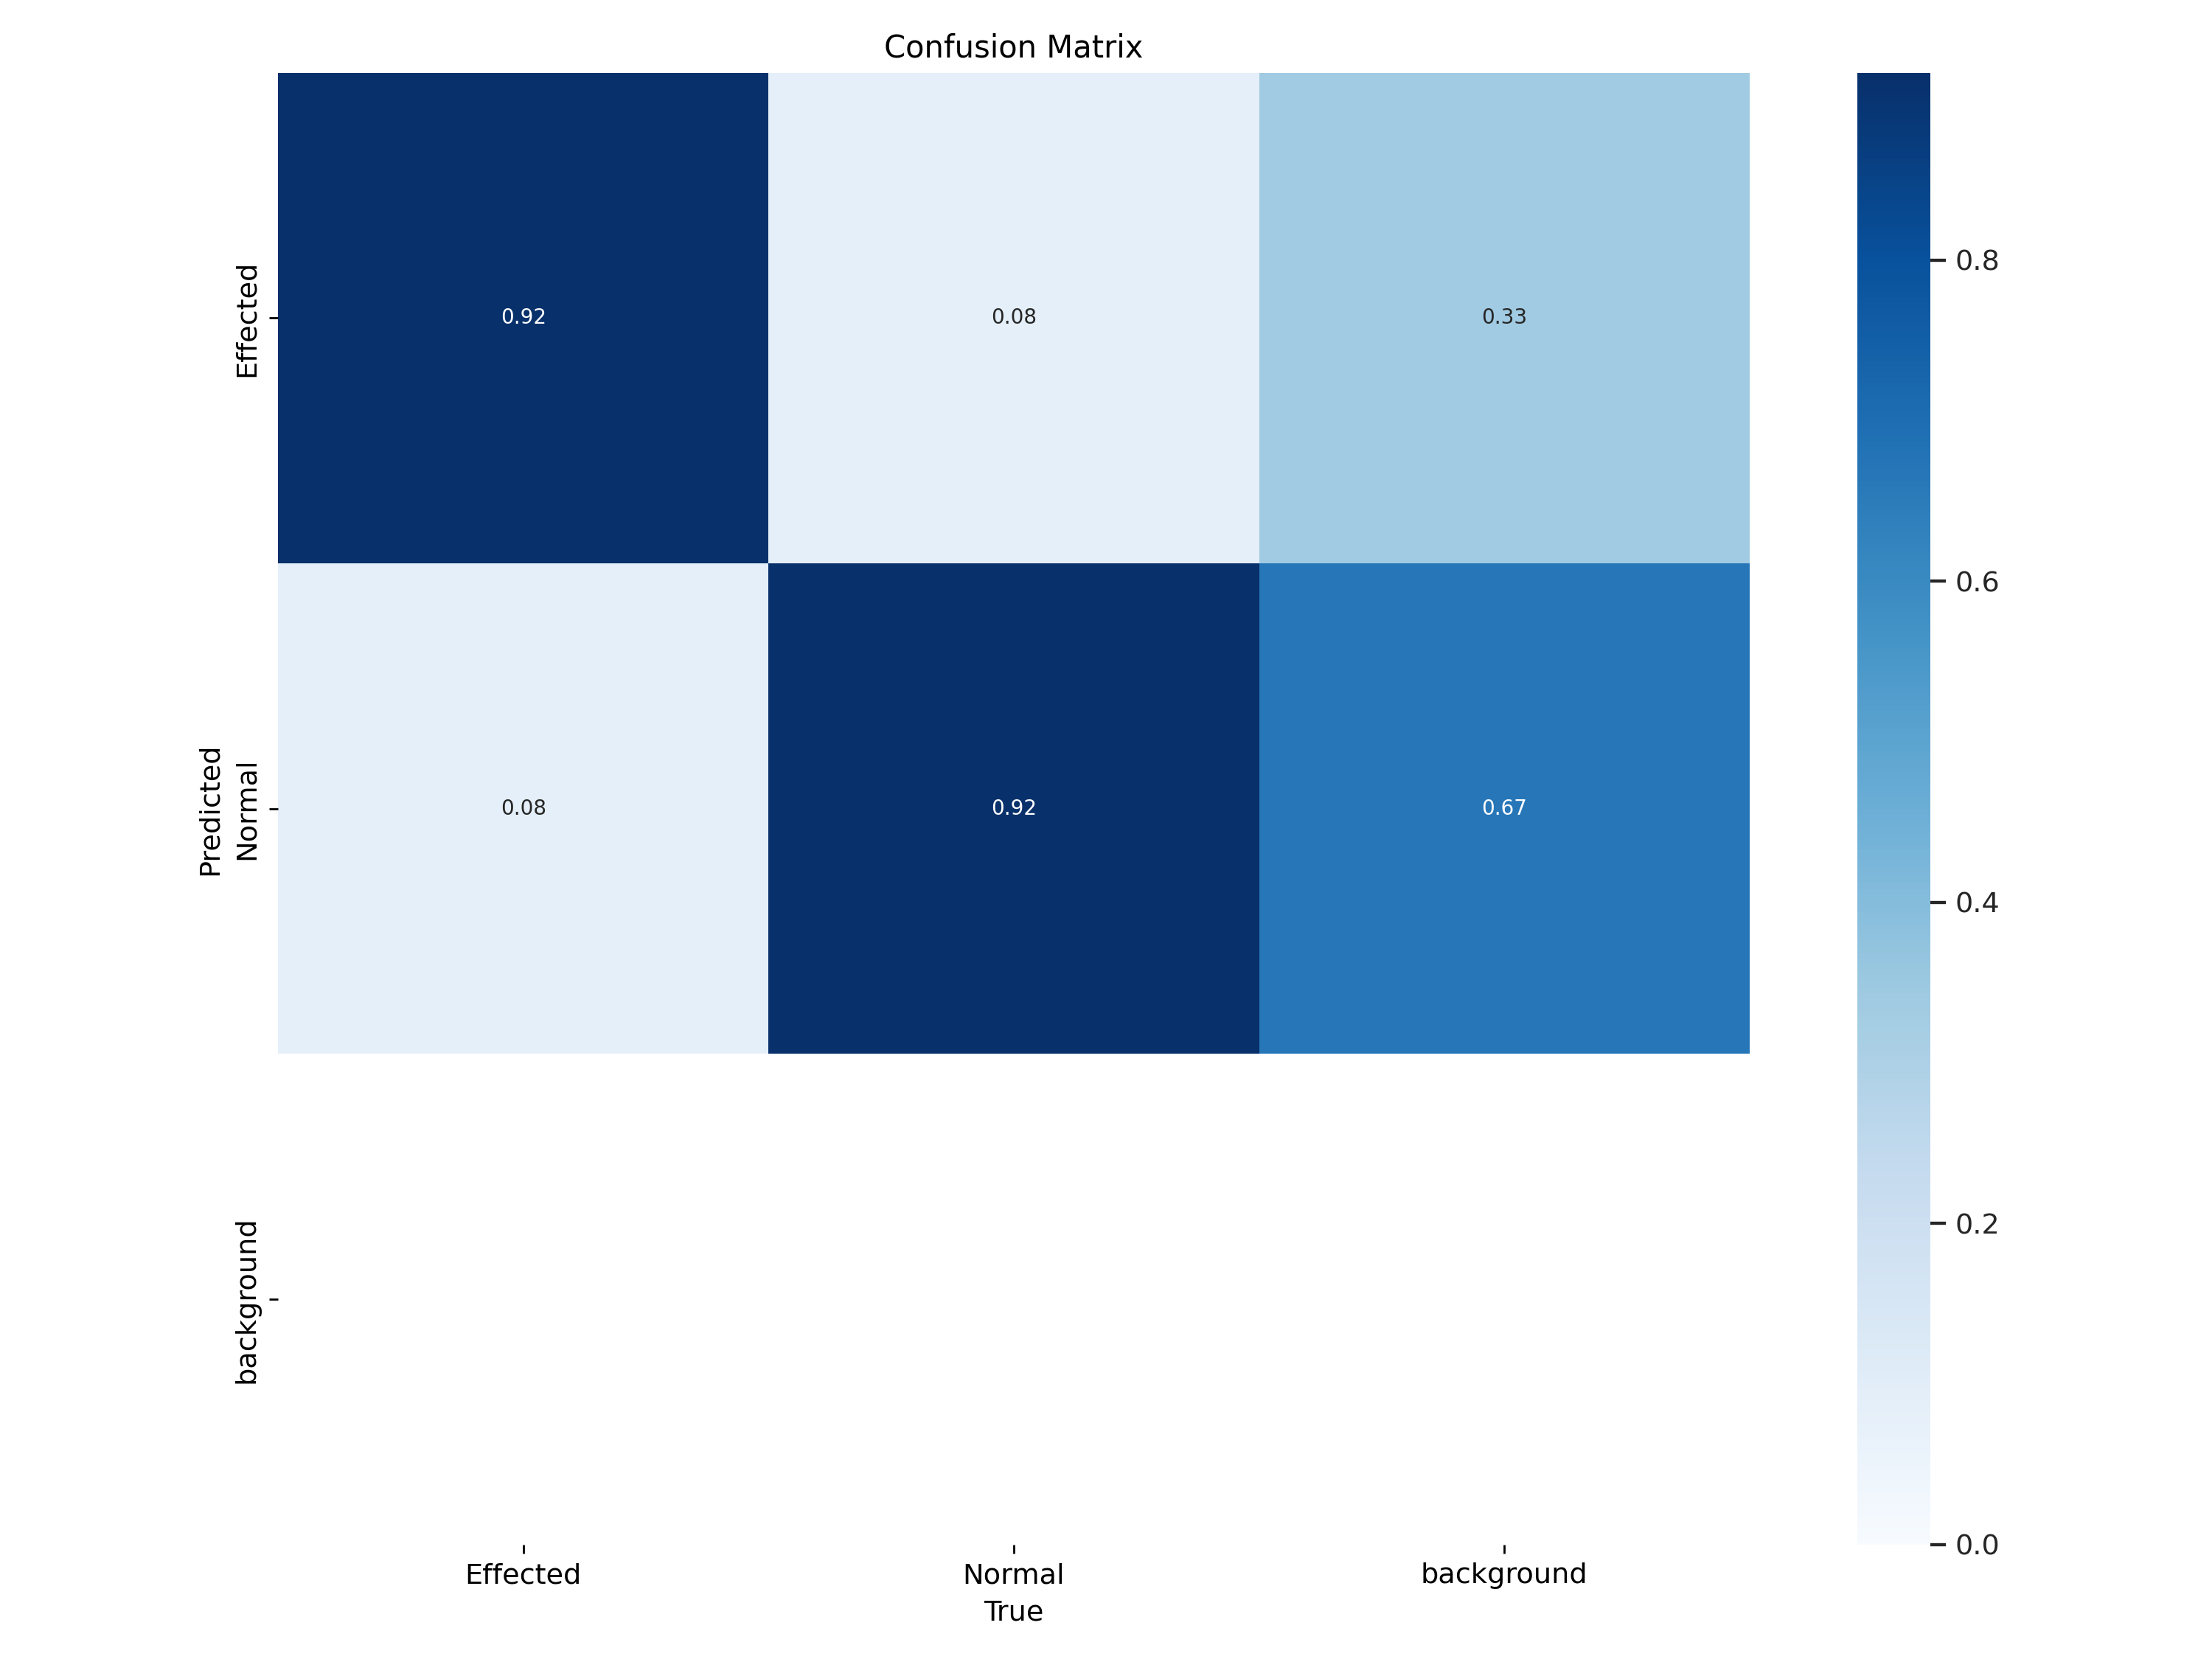

In [15]:
Image(filename='/content/drive/MyDrive/YoloV5_PNS/exp2/confusion_matrix.png', width=900)  # view results.png